In [1]:
setwd('/import/DB/zhang/bulk/')

In [2]:
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
dir='.' 
samples=list.files( dir,pattern =  'GSM' )
samples1 = samples[2:length(samples)]

In [4]:
samples

[1] "GSM6733214_T103.txt" "GSM6733215_T105.txt" "GSM6733216_T109.txt"
 [4] "GSM6733217_T110.txt" "GSM6733218_T111.txt" "GSM6733219_T112.txt"
 [7] "GSM6733220_T122.txt" "GSM6733221_T129.txt" "GSM6733222_T131.txt"
[10] "GSM6733223_T141.txt" "GSM6733224_T142.txt" "GSM6733225_T148.txt"
[13] "GSM6733226_T150.txt" "GSM6733227_T151.txt" "GSM6733228_T155.txt"
[16] "GSM6733229_T157.txt" "GSM6733230_T170.txt" "GSM6733231_T88.txt" 
[19] "GSM6733232_T89.txt"  "GSM6733233_T90.txt"  "GSM6733234_T93.txt" 
[22] "GSM6733235_T98.txt"  "GSM6733236_T99.txt"  "GSM6733237_N103.txt"
[25] "GSM6733238_N105.txt" "GSM6733239_N109.txt" "GSM6733240_N112.txt"
[28] "GSM6733241_N122.txt" "GSM6733242_N129.txt" "GSM6733243_N131.txt"
[31] "GSM6733244_N142.txt" "GSM6733245_N150.txt" "GSM6733246_N151.txt"
[34] "GSM6733247_N155.txt" "GSM6733248_N157.txt" "GSM6733249_N99.txt"

In [5]:
data = read.table('GSM6733214_T103.txt',sep = '\t',header =F)

In [6]:
l <- data.frame()
l = rbind(l,data)

In [7]:
for (pro in samples1){
 #pro=samples[1]
library (stringr)
folder=file.path(dir ,pro ) 
sce = read.table(folder,sep = '\t',header =F)
sample =  str_split(pro, "[.]")[[1]][1]
colnames(sce)[4] = sample
l = cbind(l,sce)


}

Warning message:
"package 'stringr' was built under R version 4.2.3"


In [8]:
colnames(l)[4] = 'GSM6733214_T103'

In [9]:
rna = l %>%  dplyr::select(matches("GSM"))

In [10]:
rna = cbind(l$V3,rna)

In [11]:
fpkm = rna[1:18914,]

In [12]:
colnames(fpkm)[1] = 'gene'

In [13]:
exprSet_mean <- aggregate(.~gene, mean, data = fpkm)

In [14]:
rownames(exprSet_mean) = exprSet_mean[,1]

In [15]:
expr = exprSet_mean[,-1]

In [16]:
.libPaths(c('/root/miniconda3/envs/Rdoc/lib/R/library','/root/miniconda3/envs/metadoc/lib/R/library'))

In [17]:
library(HGNChelper)

Warning message:
"package 'HGNChelper' was built under R version 4.2.3"
Please cite our software :) 
 
 Sehyun Oh et al. HGNChelper: identification and correction of invalid gene symbols for human and mouse. F1000Research 2020, 9:1493. DOI: https://doi.org/10.12688/f1000research.28033.1 
 
 Type `citation('HGNChelper')` for a BibTeX entry.



In [18]:
mtx = expr

In [19]:
t <- checkGeneSymbols(rownames(mtx))
table(t$Approved)
table(is.na(t$Suggested.Symbol))
# delete <NA> and duplicated Suggested.Symbol
mtx$Suggested.Symbol <- t$Suggested.Symbol
mtx <- mtx[!is.na(mtx$Suggested.Symbol), ]
mtx <- mtx[!duplicated(mtx$Suggested.Symbol), ]
# delete multiple Suggested.Symbol
mtx <- mtx[!grepl("///", mtx$Suggested.Symbol), ]
# reset rownames
rownames(mtx) <- mtx$Suggested.Symbol
# delete Suggested.Symbol columns
mtx <- subset(mtx, select = -c(Suggested.Symbol))
dim(mtx)

Maps last updated on: Fri May 17 15:09:37 2024

Warning message in checkGeneSymbols(rownames(mtx)):
"Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected."
Warning message in checkGeneSymbols(rownames(mtx)):
"x contains non-approved gene symbols"



FALSE  TRUE 
 1029 17868 


FALSE  TRUE 
18408   489 

[1] 18394    36

In [20]:
group=c(rep("OS",23),rep("Con",13)) 

In [21]:
library(DESeq2)
library(limma)
library(edgeR)

Warning message:
"package 'DESeq2' was built under R version 4.2.3"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.3"
Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from '

In [22]:
data = mtx

In [23]:
group_list = factor(group)
design <- model.matrix(~0+group_list)
rownames(design) = colnames(data)
colnames(design) <- levels(group_list)

keep_gene
FALSE  TRUE 
 1999 16395 

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CALML6,-8.040744,2.5548189,-22.21093,1.085248e-23,1.779264e-19,43.74162
AQP4,-5.205527,1.0459402,-19.95553,5.017099e-22,3.183822e-18,39.97529
FBXO40,-5.809994,1.3770494,-19.87164,5.825841e-22,3.183822e-18,39.85413
ACTA1,-9.923494,5.9560520,-18.91376,3.333808e-21,9.511751e-18,38.22028
PEBP4,-8.167700,2.7287414,-18.88190,3.537285e-21,9.511751e-18,38.12315
MSTN,-3.525778,0.5092769,-18.95094,3.111385e-21,9.511751e-18,38.05126


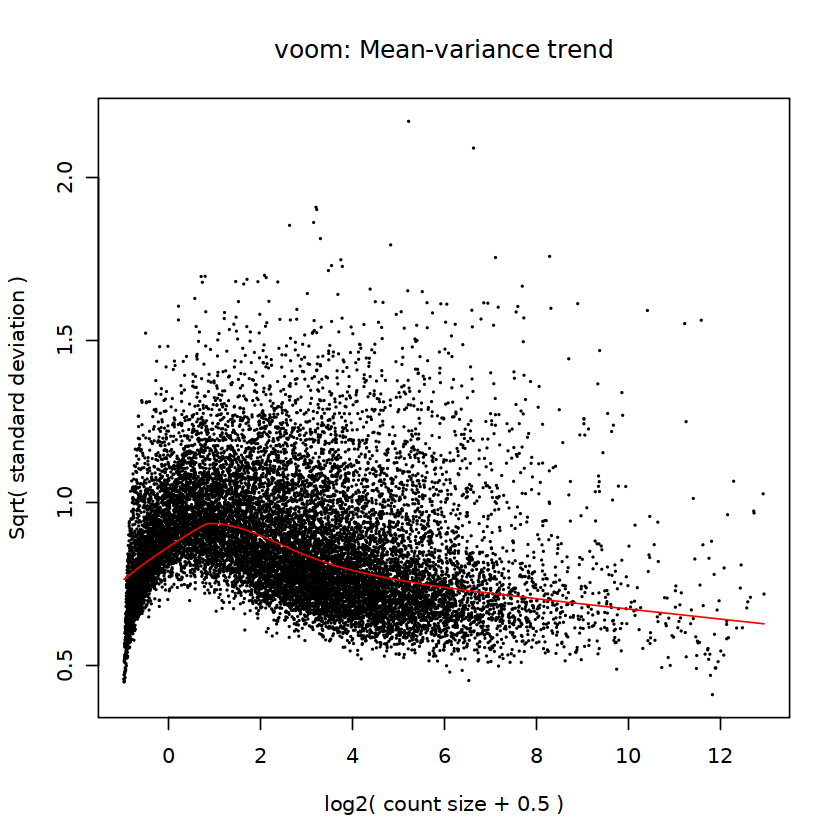

In [24]:
DGElist <- DGEList( counts = data, group = group_list )
keep_gene <- rowSums( cpm(DGElist) > 1 ) >= 1 # 自定义
table(keep_gene)
DGElist <- DGElist[ keep_gene, , keep.lib.sizes = FALSE ]

DGElist <- calcNormFactors( DGElist )
v <- voom(DGElist, design, plot = TRUE, normalize = "quantile")
fit <- lmFit(v, design)
cont.matrix <- makeContrasts(contrasts = c('OS-Con'), levels = design)

fit2 <- contrasts.fit(fit, cont.matrix)
fit2 <- eBayes(fit2)

nrDEG_limma_voom = topTable(fit2, coef = 'OS-Con', n = Inf)
nrDEG_limma_voom = na.omit(nrDEG_limma_voom)
head(nrDEG_limma_voom)


In [25]:
padj = 0.01 # 自定义
foldChange= 0.5 # 自定义
nrDEG_limma_voom_signif = nrDEG_limma_voom[(nrDEG_limma_voom$P.Value < padj & 
                          (nrDEG_limma_voom$logFC>foldChange | nrDEG_limma_voom$logFC<(-foldChange))),]
nrDEG_limma_voom_signif = nrDEG_limma_voom_signif[order(nrDEG_limma_voom_signif$logFC),]

In [26]:
nrDEG_limma_voom_signif['TBC1D16',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TBC1D16,0.7294715,3.897808,2.956705,0.005264898,0.01520754,-3.146385


In [27]:
diff = nrDEG_limma_voom
diff$group = as.factor(ifelse(diff$P.Value < padj & abs(diff$logFC) >= foldChange, 
                                 ifelse(diff$logFC> foldChange ,'Up','Down'),'NoSignifi'))
    table(diff$group)


     Down NoSignifi        Up 
     2669     10317      3409 

In [28]:
write.csv(diff,file = 'diff.csv')

In [29]:
library(ggplot2)
library(ggpubr)
library(ggrepel)
library(cowplot)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'ggpubr' was built under R version 4.2.3"
Warning message:
"package 'ggrepel' was built under R version 4.2.3"
Warning message:
"package 'cowplot' was built under R version 4.2.3"

Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




Warning message:
"Removed 137 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 137 rows containing missing values or values outside the scale range
(`geom_point()`)."


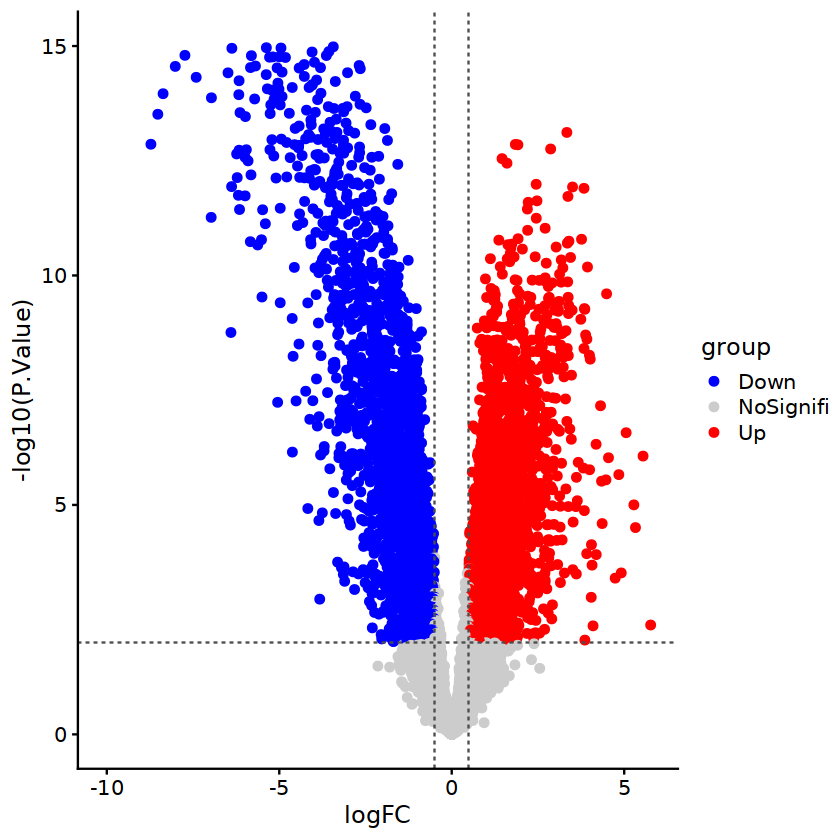

In [30]:
top_5 <- bind_rows(   
      diff %>%
        filter(group == 'Up') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0),
      diff %>%
        filter(group == 'Down') %>%
        arrange(P.Value, desc(logFC)) %>%
        head(0)
    )
    ggplot(data=diff,aes(x=logFC,y=-log10(P.Value)))+
    geom_point(aes(color=group),size=2)+
    geom_hline(yintercept = -log10(0.01), linetype="dashed",color="grey30")+
    geom_vline(xintercept = c(-0.5,0.5),linetype="dashed",color="grey30")+
    geom_text_repel(data=top_5,aes(x= logFC,y= -log10(P.Value),label= rownames(top_5)))+
    scale_color_manual(values = c("blue","grey80","red"))+
    theme_half_open() +ylim(0,15)#+xlim(-0.5,0.5)
    ggsave('Volcano.pdf',height = 8,width = 8)

In [31]:
library(clusterProfiler)
library(org.Hs.eg.db)



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRCA.treedata       tidytree
  Nnode.treedata      tidytree
  Ntip.treedata       tidytree
  ancestor.phylo      tidytree
  ancestor.treedata   tidytree
  child.phylo         tidytree
  child.treedata      tidytree
  full_join.phylo     tidytree
  full_join.treedata  tidytree
  groupClade.phylo    tidytree
  groupClade.treedata tidytree
  groupOTU.phylo      tidytree
  groupOTU.treedata   tidytree
  is.rooted.treedata  tidytree
  nodeid.phylo        tidytree
  nodeid.treedata     tidytree
  nodelab.phylo       tidytree
  nodelab.treedata    tidytree
  offspring.phylo     tidytree
  offspring.treedata  tidytree
  parent.phylo        tidytree
  parent.treedata     tidytree
  root.treedata       tidytree
  rootnode.phylo      tidytree
  sibling.phylo       tidytree

clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProf

In [32]:
jiaoji = diff %>%  filter(group != 'NoSignifi') %>%  rownames()

In [33]:
gene_symbol <- bitr(geneID = jiaoji,  
                        fromType="SYMBOL",   
                        toType=c("ENTREZID"),  
                        OrgDb="org.Hs.eg.db")
    gene <- gene_symbol[,2]
    BP <- enrichGO(gene = gene,  
                   keyType = "ENTREZID",  
                   OrgDb=org.Hs.eg.db,  
                   ont = "ALL",   
                   pvalueCutoff = 0.05,  
                   pAdjustMethod = "fdr", 
                   minGSSize = 5,   
                   maxGSSize = 500,  
                   qvalueCutoff = 1,  
                   readable = TRUE) 

'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(geneID = jiaoji, fromType = "SYMBOL", toType = c("ENTREZID"), :
"0.58% of input gene IDs are fail to map..."


In [34]:
write.csv(BP@result,file = 'GO.csv')

In [146]:
RMP = BP@result[924,]

In [194]:
RMP

,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0043112,BP,GO:0043112,receptor metabolic process,28/5520,61/18903,0.004141746,0.03932418,0.03159863,ACHE/BVES/MYLIP/OPTN/MTMR2/EHD3/PHETA2/ANXA2/PLEKHJ1/CDK5/UVRAG/NEDD4/FUT8/CHMP5/PTPN1/LAPTM5/RAMP3/MVB12A/BECN1/ITCH/SNX25/PCSK9/FURIN/AP1AR/TGFB1/ARFGEF2/PHETA1/TBC1D16,28


In [151]:
gene = str_split(RMP$geneID,'/')[[1]]

In [152]:
gene

[1] "ACHE"    "BVES"    "MYLIP"   "OPTN"    "MTMR2"   "EHD3"    "PHETA2" 
 [8] "ANXA2"   "PLEKHJ1" "CDK5"    "UVRAG"   "NEDD4"   "FUT8"    "CHMP5"  
[15] "PTPN1"   "LAPTM5"  "RAMP3"   "MVB12A"  "BECN1"   "ITCH"    "SNX25"  
[22] "PCSK9"   "FURIN"   "AP1AR"   "TGFB1"   "ARFGEF2" "PHETA1"  "TBC1D16"

In [155]:
forplot = data[gene,]

In [156]:
library(pheatmap)

Warning message:
"package 'pheatmap' was built under R version 4.2.3"


In [157]:
da=log2(forplot+1)
dat=t(scale(t(da))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

[1] 28 36

In [160]:
library(pheatmap)
annotation_col = data.frame(c(rep('OS',23),rep('Con',13)))
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
tail(dat,2)

,GSM6733214_T103,GSM6733215_T105,GSM6733216_T109,GSM6733217_T110,GSM6733218_T111,GSM6733219_T112,GSM6733220_T122,GSM6733221_T129,GSM6733222_T131,GSM6733223_T141,...,GSM6733240_N112,GSM6733241_N122,GSM6733242_N129,GSM6733243_N131,GSM6733244_N142,GSM6733245_N150,GSM6733246_N151,GSM6733247_N155,GSM6733248_N157,GSM6733249_N99
PHETA1,0.19040137,2.00000,0.1547550,1.553135,2.0000000,-0.6267803,0.856102451,1.2899716,0.8224189,0.09924627,...,-0.5634779,-1.2614902,-1.095772,-0.37861473,-0.6288621,-0.5801195,-0.9304881,-1.0124717,-0.6639045,-1.288973
TBC1D16,0.09649142,1.03669,0.6182343,1.135389,0.6726347,-0.8102879,-0.001411438,0.8176181,0.3995280,0.27338395,...,0.2424365,-0.9414749,-2.000000,-0.08353007,0.2577114,-0.7368759,-0.7556738,0.2836594,-1.6728422,-1.776946


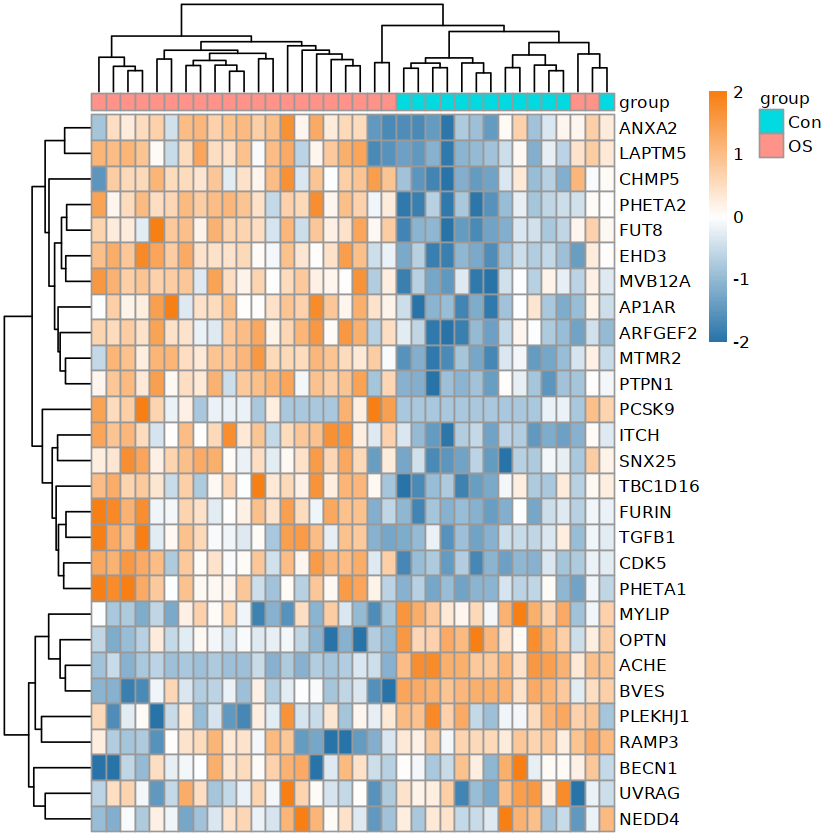

In [162]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=T,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [163]:
library(org.Hs.eg.db)
library(clusterProfiler)
gene <- bitr(rownames(nrDEG_limma_voom),     #转换的列是nrDEG的列名
             fromType = "SYMBOL",     #需要转换ID类型
             toType =  "ENTREZID",    #转换成的ID类型
             OrgDb = org.Hs.eg.db)    #对应的物种，小鼠的是org.Mm.eg.db

'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(nrDEG_limma_voom), fromType = "SYMBOL", toType = "ENTREZID", :
"0.52% of input gene IDs are fail to map..."


In [164]:
#让基因名、ENTREZID、logFC对应起来
gene$logFC <- nrDEG_limma_voom$logFC	[match(gene$SYMBOL,rownames(nrDEG_limma_voom))]

In [165]:
geneList=gene$logFC
names(geneList)=gene$ENTREZID 
#按照logFC的值来排序geneList
geneList=sort(geneList,decreasing = T)
head(geneList)

3381     6696     1301     1029     1404   387733 
5.767099 5.546373 5.326937 5.280353 5.055879 4.914438

In [171]:
go.res = gseGO(
  geneList, #geneList
  ont = "BP",  # 可选"BP"、"MF"和"CC"或"ALL"
  OrgDb = org.Hs.eg.db, #人 注释基因
  keyType = "ENTREZID",
  pvalueCutoff = 0.5,
  pAdjustMethod = "fdr",#p值校正方法
)

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.11% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation."
leading edge analysis...

done...



In [172]:
go.res@result['GO:0043112',]

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### kegg

In [173]:
library(enrichplot)

Warning message:
"package 'enrichplot' was built under R version 4.2.2"

Attaching package: 'enrichplot'


The following object is masked from 'package:ggpubr':

    color_palette




In [176]:
ek <- enrichKEGG(gene =gene$ENTREZID , 
                   organism = "hsa",  
                   pvalueCutoff =1, 
                   qvalueCutoff = 1) 

In [183]:
kk2 = setReadable(ek,
                  OrgDb = "org.Hs.eg.db",
                  keyType = "ENTREZID")

In [186]:
grep('TBC1D16',kk2@result$geneID,value = T)

character(0)

In [192]:
data1 =t(forplot) %>% as.data.frame()

In [193]:
save(data1,file = 'data1.rda')

In [196]:
save(data,file = 'fpkm.rda')

### 按TBC1D16分为高低表达的两组

In [36]:
gene.counts = data[,1:23]

In [37]:
library(TCGAbiolinks)

In [38]:
gene <- "TBC1D16"
gene.exp <- gene.counts[gene,] %>%
    t() %>% as.data.frame() %>%
    mutate(label = ifelse(!!sym(gene) < median(!!sym(gene)), 0, 1))

group.low <- gene.counts[,gene.exp$label == 0]
group.high <- gene.counts[,gene.exp$label == 1]


Batch correction skipped since no factors provided

----------------------- DEA -------------------------------

o 11 samples in Cond1type CCDC134_Low

o 12 samples in Cond2type CCDC134_High

o 18394 features as miRNA or genes 

This may take some minutes...

Warning message:
"Zero sample variances detected, have been offset away from zero"
----------------------- END DEA -------------------------------



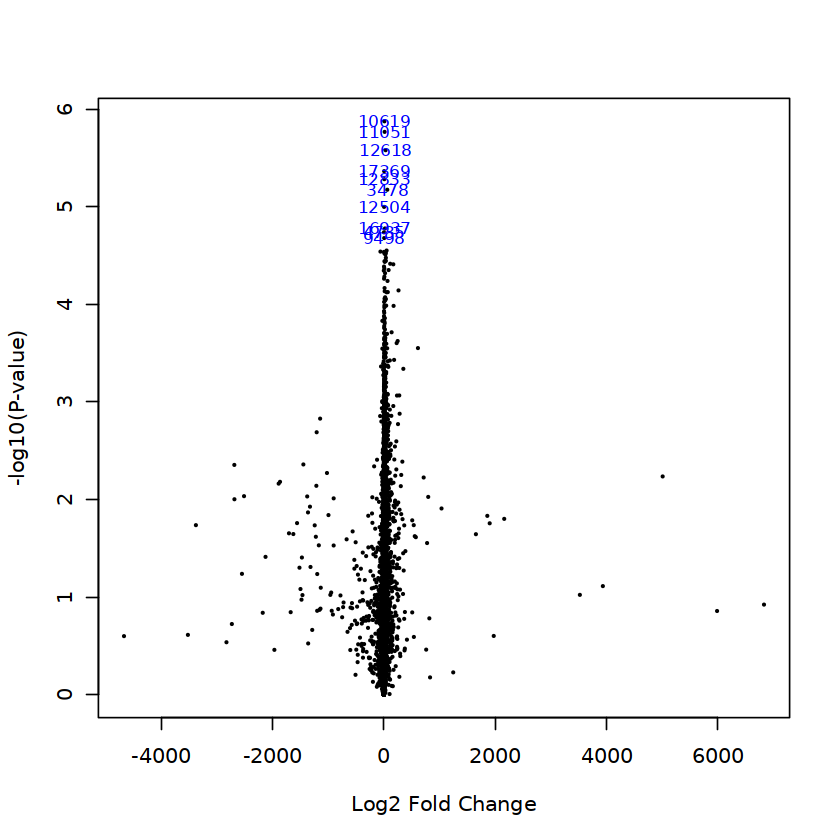

In [39]:
DEGs <- TCGAanalyze_DEA(
  mat1 = group.low,
  mat2 = group.high,
  metadata = FALSE,
  pipeline = "limma",
  Cond1type = "CCDC134_Low",
  Cond2type = "CCDC134_High",
  fdr.cut = 1,
  logFC.cut = 0
)


In [40]:
write.csv(DEGs,file = 'p23.csv')

Warning message:
"package 'enrichplot' was built under R version 4.2.2"

Attaching package: 'enrichplot'


The following object is masked from 'package:ggpubr':

    color_palette


'select()' returned 1:many mapping between keys and columns

Warning message in bitr(rownames(DEGs), fromType = "SYMBOL", toType = "ENTREZID", :
"0.57% of input gene IDs are fail to map..."


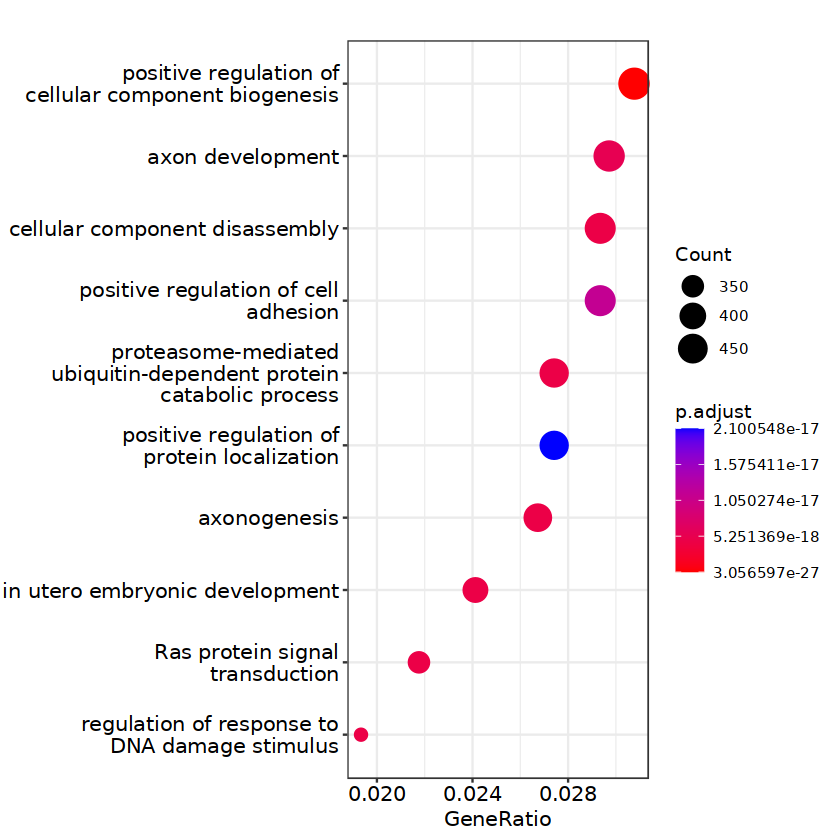

In [41]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(enrichplot)

gene.id <- bitr(
    rownames(DEGs), fromType = "SYMBOL",
    toType = "ENTREZID",
    OrgDb = org.Hs.eg.db
)
go <- enrichGO(
    gene = gene.id$ENTREZID,
    OrgDb = org.Hs.eg.db,
    ont = "BP",
    pAdjustMethod = "BH",
    qvalueCutoff = 0.05,
    readable = T
)
dotplot(go)


In [48]:
grep('P450',go@result$Description,value = T)

[1] "omega-hydroxylase P450 pathway" "epoxygenase P450 pathway"

In [42]:
CYP = grep('^CYP',rownames(data),value = T)

In [43]:
exp2 = cbind(group.high,group.low)

In [68]:
exp2 = exp2[CYP,]

In [69]:
library(pheatmap)
#da=log2(data1+1)
dat=t(scale(t(exp2))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)

dat = dat[complete.cases(dat), ]


Warning message:
"package 'pheatmap' was built under R version 4.2.3"


[1] 54 23

In [73]:
library(pheatmap)
annotation_col = data.frame(c(rep('high',12),rep('low',11)))
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

,GSM6733215_T105,GSM6733216_T109,GSM6733217_T110,GSM6733218_T111,GSM6733221_T129,GSM6733222_T131,GSM6733224_T142,GSM6733225_T148,GSM6733227_T151,GSM6733228_T155,...,GSM6733219_T112,GSM6733220_T122,GSM6733223_T141,GSM6733226_T150,GSM6733231_T88,GSM6733232_T89,GSM6733233_T90,GSM6733234_T93,GSM6733235_T98,GSM6733236_T99
CYP11A1,1.2689993,-0.6166866,-0.4188416,0.7331450,0.002482069,-0.6166866,-0.6166866,2.0000000,-0.6166866,0.3403115,...,-0.1971699,-0.3775794,-0.6166866,-0.1088461,-0.6166866,-0.2837772,0.3779799,-0.04056648,-0.1187713,-0.3649937
CYP17A1,-0.3709353,-0.3709353,-0.3709353,-0.3709353,1.760144514,-0.3709353,2.0000000,-0.3709353,-0.3709353,-0.3709353,...,-0.3709353,-0.3709353,-0.3709353,-0.3709353,-0.3709353,-0.3709353,-0.3709353,-0.37093525,-0.3709353,2.0000000


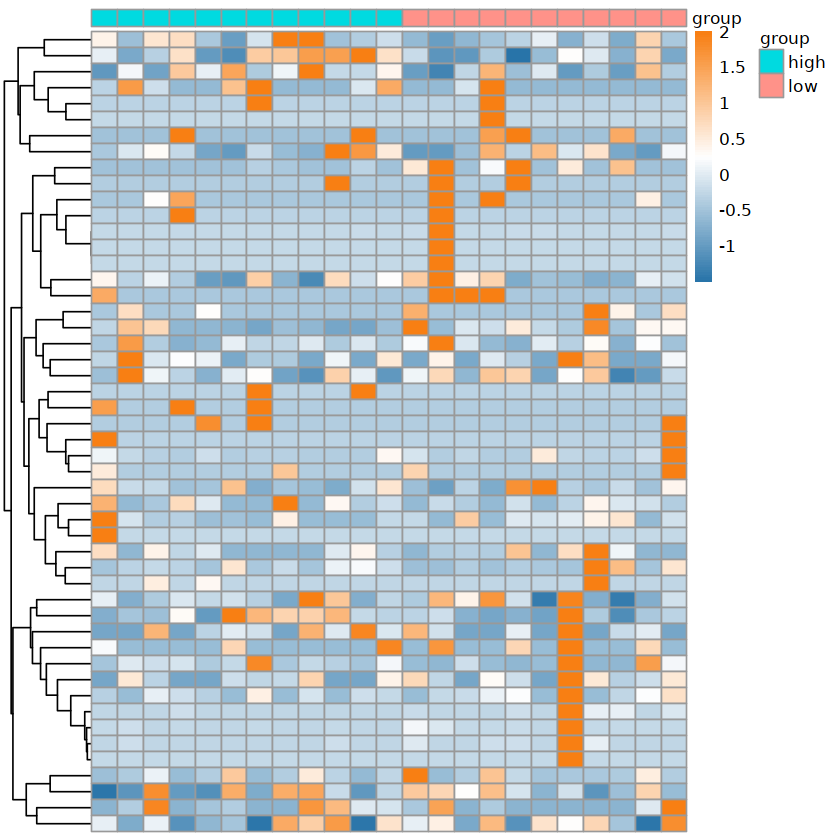

In [78]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="none",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)